In [24]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models.segmentation as segmentation
from torchvision.utils import make_grid
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the directory containing images
image_dir = '/images_cifar'
# Create a list of image file paths
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith('.jpeg')]

# Load a pretrained FCN-ResNet101 model
model = segmentation.fcn_resnet101(pretrained=True)

# Set the model to evaluation mode
model.eval()

# Define a transform to preprocess images for the model
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [25]:
print(image_paths)

['/content/drive/MyDrive/images_cifar/mototrbike1.jpeg', '/content/drive/MyDrive/images_cifar/horse1.jpeg', '/content/drive/MyDrive/images_cifar/horse.jpeg', '/content/drive/MyDrive/images_cifar/car1.jpeg', '/content/drive/MyDrive/images_cifar/boat1.jpeg', '/content/drive/MyDrive/images_cifar/aeroplane.jpeg']


In [26]:
image = Image.open(image_paths[4])


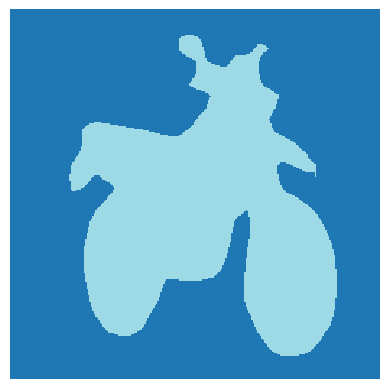

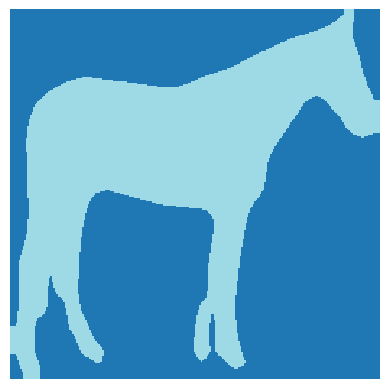

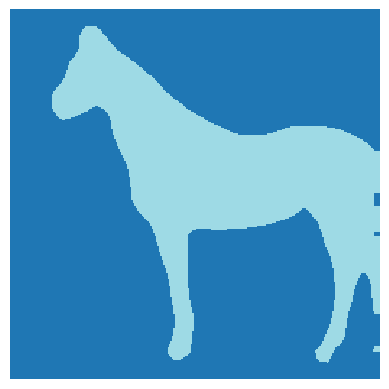

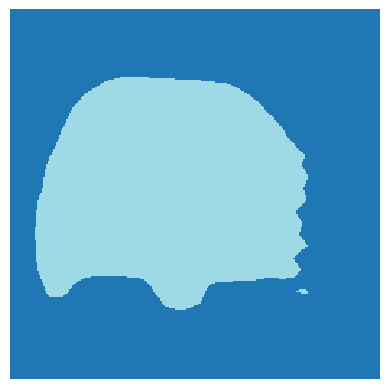

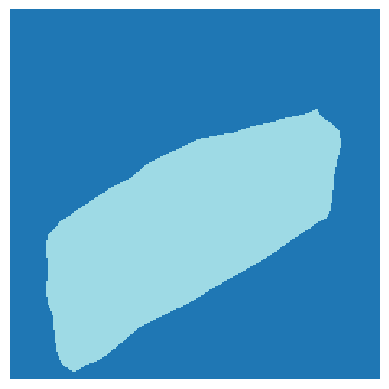

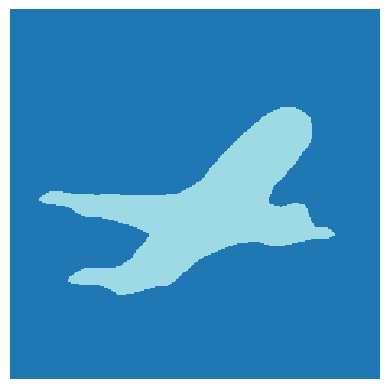

Segmentation and feature maps saved.


In [27]:
# Process each image
for image_path in image_paths:
    # Load the image and apply the preprocessing transform
    image = Image.open(image_path)
    image_tensor = preprocess(image)
    image_tensor = image_tensor.unsqueeze(0)  # Add batch dimension

    # Pass the image through the FCN model
    with torch.no_grad():
        output = model(image_tensor)['out']

    # Create a grid of feature maps (you may need to adjust this depending on your preference)
    feature_maps_grid = make_grid(output, nrow=7)  # 21 feature maps in a 7x3 grid

    # Create a segmentation image
    class_predictions = output.argmax(1).squeeze().numpy()
    plt.imshow(class_predictions, cmap='tab20', interpolation='none')
    plt.axis('off')

    # Save the feature maps and segmentation image
    feature_maps_grid_path = os.path.splitext(image_path)[0] + '_feature_maps.jpeg'
    plt.savefig(feature_maps_grid_path, bbox_inches='tight', pad_inches=0, format='jpeg')

    segmentation_image_path = os.path.splitext(image_path)[0] + '_segmentation.jpeg'
    plt.savefig(segmentation_image_path, bbox_inches='tight', pad_inches=0, format='jpeg')

    # Show the feature maps and segmentation image
    plt.show()

print("Segmentation and feature maps saved.")
